# KODE OOK based on standard 7A - Transmitter

#Transmitter side

In [4]:
## Hamming 16 bit -Transmitter " Standard 7a"
import numpy as np
input_data = "4"
print("input data:", input_data)
# 1. Convert Teks ke Biner (Bit Stream)
def text_to_bits(text):
    return ''.join(format(ord(char), '08b') for char in text)

def hamming_encoder(data_bits):
    encoded_bits = []
    for i in range(0, len(data_bits), 4):
        # Ambil 4 bit data
        data = data_bits[i:i+4]
        
        # Hitung bit paritas
        p1 = (int(data[0]) + int(data[1]) + int(data[3])) % 2  # p1 = d1 + d2 + d4
        p2 = (int(data[0]) + int(data[2]) + int(data[3])) % 2  # p2 = d1 + d3 + d4
        p3 = (int(data[1]) + int(data[2]) + int(data[3])) % 2  # p3 = d2 + d3 + d4
        p4 = (p1 + p2 + int(data[0]) + p3 + int(data[1]) + int(data[2]) + int(data[3])) % 2  # p4 = p1 + p2 + d1 + p3 + d2 + d3 + d4
        
        # Gabungkan dalam urutan Hamming (8,4): p1, p2, d1, p3, d2, d3, d4, p4
        encoded_bits.append(str(p1) + str(p2) + data[0] + str(p3) + data[1] + data[2] + data[3] + str(p4))
    
    return ''.join(encoded_bits)

# 3. RLL Encoder (Manchester)
def manchester_encoding(data_bits):
    manchester_bits = []
    for bit in data_bits:
        if bit == '1':
            manchester_bits.append('10')  # Manchester encoding untuk 1
        else:
            manchester_bits.append('01')  # Manchester encoding untuk 0
    return ''.join(manchester_bits)

# 4. Low Rate Preamble (6 bit)
def add_preamble(encoded_bits, preamble="10101010"):
    return preamble + encoded_bits

# 5. OOK Modulation
def ook_modulation(data_bits):
    # OOK: 1 -> ON, 0 -> OFF
    return [1 if bit == '1' else 0 for bit in data_bits]

# Main Transmitter Function
def transmitter(input_data):
    # Step 1: Convert Teks ke Biner (Bit Stream)
    bit_stream = text_to_bits(input_data)
    print(f"Bit Stream: {bit_stream}")
    
    # Step 2: FEC Encoding (Hamming 8,4)
    encoded_bits = hamming_encoder(bit_stream)
    print(f"Encoded Bits (Hamming 8,4): {encoded_bits}")
    
    # Step 3: RLL Encoding (Manchester)
    manchester_bits = manchester_encoding(encoded_bits)
    print(f"Manchester Encoded Bits: {manchester_bits}")
    
    # Step 4: Add Low Rate Preamble (6-bit)
    preambled_bits = add_preamble(manchester_bits)
    print(f"\nSignal Length: {len(preambled_bits)}")
    print(f"Bits with Preamble: {preambled_bits}")

    # Step 5: OOK Modulation
    modulated_signal = ook_modulation(preambled_bits)
    print(f"OOK Modulated Signal: {modulated_signal}")
    
    return modulated_signal


modulated_signal = transmitter(input_data)


input data: 4
Bit Stream: 00110100
Encoded Bits (Hamming 8,4): 1000011110011001
Manchester Encoded Bits: 10010101011010101001011010010110

Signal Length: 40
Bits with Preamble: 1010101010010101011010101001011010010110
OOK Modulated Signal: [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0]


#Hybrid mode

In [96]:
OOK = [1, 0, 1, 0, 0, 1, 0]
hello1 = [7, 16, 9, 12, 12, 11, 9, 14, 7, 8, 16, 0, 2, 14, 16, 15, 2, 16, 12, 11, 12, 9, 12, 4, 16, 16, 12, 11, 0, 9, 12, 4, 7, 9, 9]

# Initialize the pointer for the hello1 data
pointer = 0
result = []

# Iterate through the OOK array and slice the hello1 array accordingly
for bit in OOK:
    slice_size = 5
    if pointer + slice_size <= len(hello1):
        data_chunk = hello1[pointer:pointer + slice_size]
        result.append((bit, data_chunk))
        pointer += slice_size

# Output result
for bit, data in result:
    print(f"{bit} = {', '.join(map(str, data))}")


1 = 7, 16, 9, 12, 12
0 = 11, 9, 14, 7, 8
1 = 16, 0, 2, 14, 16
0 = 15, 2, 16, 12, 11
0 = 12, 9, 12, 4, 16
1 = 16, 12, 11, 0, 9
0 = 12, 4, 7, 9, 9


In [74]:
#next
OOK = [1, 0, 1, 0, 0, 1, 0]
hello1 = [7, 16, 9, 12, 12, 11, 9, 14, 7, 8, 16, 0, 2, 14, 16, 15, 2, 16, 12, 11, 12, 9, 12, 4, 16, 16, 12, 11, 0, 9, 12, 4, 7, 9, 9]

hello1.extend([0] * 7)
print("HC = ",hello1)

# Initialize the pointer for the hello1 data
pointer = 0
result = []

# Iterate through the OOK array and slice the hello1 array accordingly
for bit in OOK:
    slice_size = 6
    if pointer + slice_size <= len(hello1):
        data_chunk = hello1[pointer:pointer + slice_size]
        result.append((bit, data_chunk))
        pointer += slice_size

# Output result
for bit, data in result:
    print(f"{bit} = {', '.join(map(str, data))}")


HC =  [7, 16, 9, 12, 12, 11, 9, 14, 7, 8, 16, 0, 2, 14, 16, 15, 2, 16, 12, 11, 12, 9, 12, 4, 16, 16, 12, 11, 0, 9, 12, 4, 7, 9, 9, 0, 0, 0, 0, 0, 0, 0]
1 = 7, 16, 9, 12, 12, 11
0 = 9, 14, 7, 8, 16, 0
1 = 2, 14, 16, 15, 2, 16
0 = 12, 11, 12, 9, 12, 4
0 = 16, 16, 12, 11, 0, 9
1 = 12, 4, 7, 9, 9, 0
0 = 0, 0, 0, 0, 0, 0


In [75]:
#Extend data

hello1.extend([0] * 36)
print("HC = ",hello1)

# if len(hello1) == 5:  # Tambahkan 0 hanya jika panjang asli belum berubah
#     hello1.extend([0] * 36)
# print("HC = ",hello1)



HC =  [7, 16, 9, 12, 12, 11, 9, 14, 7, 8, 16, 0, 2, 14, 16, 15, 2, 16, 12, 11, 12, 9, 12, 4, 16, 16, 12, 11, 0, 9, 12, 4, 7, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [76]:
#Kode belum sederhana
OOK = [1, 0, 1, 0, 0, 1, 0]  ## 7 bit
# hello1 = [7, 16, 9, 12, 12, 11, 9, 14, 7, 8, 16, 0, 2, 14, 16, 15, 2, 16, 12, 11, 12, 9, 12, 4, 16, 16, 12, 11, 0, 9, 12, 4, 7, 9, 9]
hello1 = [128, 202, 140, 169, 168, 165, 146, 191, 129, 140, 206, 70, 87, 188, 206, 196, 89, 203, 175, 162, 173, 145, 173, 102, 205, 207, 173, 165, 70, 150, 169, 105, 128, 148, 147, 166, 87, 173, 146, 182, 129, 119, 206, 207, 173, 94, 205, 69, 89, 170, 88, 69, 172, 173, 207, 104, 175, 174, 85, 207, 204, 172, 112, 165, 205, 206, 146, 147, 173, 156, 121, 180, 132, 111, 206, 70, 173, 136, 73, 145, 129, 145, 86, 206, 87, 69, 147, 163, 205, 181, 203, 165, 86, 148, 202, 131, 206, 156, 130, 206, 131, 188, 207, 193, 72, 71, 130, 180, 130, 138, 204, 86, 130, 163, 103, 148, 170, 206, 103, 182, 205, 129, 161, 71, 86, 163, 165, 149, 173, 171, 86, 205, 206, 171, 115, 162, 89, 172, 90, 69, 172, 173, 205, 102, 173, 206, 172, 206, 87, 73, 169, 148, 170, 121, 169, 205, 86, 206, 172, 145, 207, 171, 209, 128, 72, 170, 73, 127, 206, 171, 114, 129, 205, 171, 146, 131, 206, 98, 203, 209, 86, 148, 103, 172, 128, 174, 190, 79, 86, 118, 163, 177]

# Extend hello1 to match the length requirements, if needed
hello1.extend([0] * 7)
print("HC =", hello1)

# Define slice size and initialize pointer
slice_size = 6
pointer = 0
result = []

# Iterate through the OOK array and slice the hello1 array accordingly
for bit in OOK:
    # Ensure we don't exceed the length of hello1
    data_chunk = hello1[pointer:pointer + slice_size]
    result.append((bit, data_chunk))
    pointer += slice_size

# Output result
for bit, data in result:
    print(f"{bit} = {', '.join(map(str, data))}")


HC = [128, 202, 140, 169, 168, 165, 146, 191, 129, 140, 206, 70, 87, 188, 206, 196, 89, 203, 175, 162, 173, 145, 173, 102, 205, 207, 173, 165, 70, 150, 169, 105, 128, 148, 147, 166, 87, 173, 146, 182, 129, 119, 206, 207, 173, 94, 205, 69, 89, 170, 88, 69, 172, 173, 207, 104, 175, 174, 85, 207, 204, 172, 112, 165, 205, 206, 146, 147, 173, 156, 121, 180, 132, 111, 206, 70, 173, 136, 73, 145, 129, 145, 86, 206, 87, 69, 147, 163, 205, 181, 203, 165, 86, 148, 202, 131, 206, 156, 130, 206, 131, 188, 207, 193, 72, 71, 130, 180, 130, 138, 204, 86, 130, 163, 103, 148, 170, 206, 103, 182, 205, 129, 161, 71, 86, 163, 165, 149, 173, 171, 86, 205, 206, 171, 115, 162, 89, 172, 90, 69, 172, 173, 205, 102, 173, 206, 172, 206, 87, 73, 169, 148, 170, 121, 169, 205, 86, 206, 172, 145, 207, 171, 209, 128, 72, 170, 73, 127, 206, 171, 114, 129, 205, 171, 146, 131, 206, 98, 203, 209, 86, 148, 103, 172, 128, 174, 190, 79, 86, 118, 163, 177, 0, 0, 0, 0, 0, 0, 0]
1 = 128, 202, 140, 169, 168, 165
0 = 146, 191, 1

In [77]:
# Kode sudah sederhana (fix 11PM) (Sudah Mixing, tapi jadi konsern, kalau OOK ada 7 bit, OFDM harus ada dikelipatan 7bit)
#tapi ini masih contoh, kalau untuk OFDM kita, bit OOK = 38, OFDM = 192 + 36(bit 0), jadi total = 228 OFDM. 228/38 = 6 bit per OOK


OOK = [1, 0, 1, 0, 0, 1, 0]
# OOK = [1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0]

#35 bit
hello1 = [7, 16, 9, 12, 12, 11, 9, 14, 7, 8, 16, 0, 2, 14, 16, 15, 2, 16, 12, 11, 12, 9, 12, 4, 16, 16, 12, 11, 0, 9, 12, 4, 7, 9, 9]
# hello1 = [128, 202, 140, 169, 168, 165, 146, 191, 129, 140, 206, 70, 87, 188, 206, 196, 89, 203, 175, 162, 173, 145, 173, 102, 205, 207, 173, 165, 70, 150, 169, 105, 128, 148, 147, 166, 87, 173, 146, 182, 129, 119, 206, 207, 173, 94, 205, 69, 89, 170, 88, 69, 172, 173, 207, 104, 175, 174, 85, 207, 204, 172, 112, 165, 205, 206, 146, 147, 173, 156, 121, 180, 132, 111, 206, 70, 173, 136, 73, 145, 129, 145, 86, 206, 87, 69, 147, 163, 205, 181, 203, 165, 86, 148, 202, 131, 206, 156, 130, 206, 131, 188, 207, 193, 72, 71, 130, 180, 130, 138, 204, 86, 130, 163, 103, 148, 170, 206, 103, 182, 205, 129, 161, 71, 86, 163, 165, 149, 173, 171, 86, 205, 206, 171, 115, 162, 89, 172, 90, 69, 172, 173, 205, 102, 173, 206, 172, 206, 87, 73, 169, 148, 170, 121, 169, 205, 86, 206, 172, 145, 207, 171, 209, 128, 72, 170, 73, 127, 206, 171, 114, 129, 205, 171, 146, 131, 206, 98, 203, 209, 86, 148, 103, 172, 128, 174, 190, 79, 86, 118, 163, 177]

# Extend hello1 with 7 additional zeros
hello1.extend([0] * 7)
print("HC =", hello1)

# Calculate the chunk size
chunk_size = len(hello1) // len(OOK)

# Pad hello1 to ensure it can be evenly divided by OOK length
hello1.extend([0] * (len(OOK) * chunk_size - len(hello1)))

# Distribute chunks to each bit in OOK
result = [(bit, hello1[i * chunk_size:(i + 1) * chunk_size]) for i, bit in enumerate(OOK)]

# Output result
for bit, data in result:
    print(f"{bit} = {', '.join(map(str, data))}")


HC = [7, 16, 9, 12, 12, 11, 9, 14, 7, 8, 16, 0, 2, 14, 16, 15, 2, 16, 12, 11, 12, 9, 12, 4, 16, 16, 12, 11, 0, 9, 12, 4, 7, 9, 9, 0, 0, 0, 0, 0, 0, 0]
1 = 7, 16, 9, 12, 12, 11
0 = 9, 14, 7, 8, 16, 0
1 = 2, 14, 16, 15, 2, 16
0 = 12, 11, 12, 9, 12, 4
0 = 16, 16, 12, 11, 0, 9
1 = 12, 4, 7, 9, 9, 0
0 = 0, 0, 0, 0, 0, 0


In [78]:
# Clipping +200(high), +100(low)
#sudah sederhana (fix 11PM) (Sudah Mixing, tapi jadi konsern, kalau OOK ada 7 bit, OFDM harus ada dikelipatan 7bit)
#tapi ini masih contoh, kalau untuk OFDM kita, bit OOK = 38, OFDM = 192 + 36(bit 0), jadi total = 228 OFDM. 228/38 = 6 bit per OOK


OOK = [1, 0, 1, 0, 0, 1, 0]

hello1 = [7, 16, 9, 12, 12, 11, 9, 14, 7, 8, 16, 0, 2, 14, 16, 15, 2, 16, 12, 11, 12, 9, 12, 4, 16, 16, 12, 11, 0, 9, 12, 4, 7, 9, 9]

# Extend hello1 with 7 additional zeros
hello1.extend([0] * 7)
print("HC =", hello1)

# Calculate the chunk size
chunk_size = len(hello1) // len(OOK)

# Pad hello1 to ensure it can be evenly divided by OOK length
hello1.extend([0] * (len(OOK) * chunk_size - len(hello1)))

# Distribute chunks to each bit in OOK with clipping
result = []
for i, bit in enumerate(OOK):
    # Extract the chunk for the current bit
    data_chunk = hello1[i * chunk_size:(i + 1) * chunk_size]
    # Apply clipping based on the value of the bit
    if bit == 1:
        data_chunk = [value + 200 for value in data_chunk]
    else:
        data_chunk = [value + 100 for value in data_chunk]
    # Append the result with the modified data chunk
    result.append((bit, data_chunk))

# Output result
for bit, data in result:
    print(f"{bit} = {', '.join(map(str, data))}")


HC = [7, 16, 9, 12, 12, 11, 9, 14, 7, 8, 16, 0, 2, 14, 16, 15, 2, 16, 12, 11, 12, 9, 12, 4, 16, 16, 12, 11, 0, 9, 12, 4, 7, 9, 9, 0, 0, 0, 0, 0, 0, 0]
1 = 207, 216, 209, 212, 212, 211
0 = 109, 114, 107, 108, 116, 100
1 = 202, 214, 216, 215, 202, 216
0 = 112, 111, 112, 109, 112, 104
0 = 116, 116, 112, 111, 100, 109
1 = 212, 204, 207, 209, 209, 200
0 = 100, 100, 100, 100, 100, 100


In [88]:
# Mixing Code, setiap bit 1 dan 0, digabung lagi menjadi 1 array
# Clipping +200(high), +100(low)
#sudah sederhana (fix 11PM) (Sudah Mixing, tapi jadi konsern, kalau OOK ada 7 bit, OFDM harus ada dikelipatan 7bit)
#---tapi ini masih contoh, kalau untuk OFDM kita, bit OOK = 38, OFDM = 192 + 36(bit 0), jadi total = 228 OFDM. 228/38 = 6 bit per OOK

OOK = [1, 0, 1, 0, 0, 1, 0]
hello1 = [7, 16, 9, 12, 12, 11, 9, 14, 7, 8, 16, 0, 2, 14, 16, 15, 2, 16, 12, 11, 12, 9, 12, 4, 16, 16, 12, 11, 0, 9, 12, 4, 7, 9, 9]

# Extend hello1 with 7 additional zeros
hello1.extend([0] * 7)
print("HC =", hello1)

# Calculate the chunk size
chunk_size = len(hello1) // len(OOK)

# Pad hello1 to ensure it can be evenly divided by OOK length
hello1.extend([0] * (len(OOK) * chunk_size - len(hello1)))

# Distribute chunks to each bit in OOK with clipping
result = []
for i, bit in enumerate(OOK):
    # Extract the chunk for the current bit
    data_chunk = hello1[i * chunk_size:(i + 1) * chunk_size]
    # Apply clipping based on the value of the bit
    if bit == 1:
        data_chunk = [value + 200 for value in data_chunk]
    else:
        data_chunk = [value + 100 for value in data_chunk]
    # Append the result with the modified data chunk
    result.append((bit, data_chunk))

# Combine all chunks into one array
combined_data = [data for _, data_chunk in result for data in data_chunk]

# Output result
print("\nData OOK+OFDM MIXING CLIPPING =")
for bit, data in result:
    print(f"{bit} = {', '.join(map(str, data))}")

# Output the combined array
print("\nMixing Data:")
print(combined_data)




HC = [7, 16, 9, 12, 12, 11, 9, 14, 7, 8, 16, 0, 2, 14, 16, 15, 2, 16, 12, 11, 12, 9, 12, 4, 16, 16, 12, 11, 0, 9, 12, 4, 7, 9, 9, 0, 0, 0, 0, 0, 0, 0]

Data OOK+OFDM MIXING CLIPPING =
1 = 207, 216, 209, 212, 212, 211
0 = 109, 114, 107, 108, 116, 100
1 = 202, 214, 216, 215, 202, 216
0 = 112, 111, 112, 109, 112, 104
0 = 116, 116, 112, 111, 100, 109
1 = 212, 204, 207, 209, 209, 200
0 = 100, 100, 100, 100, 100, 100

Mixing Data:
[207, 216, 209, 212, 212, 211, 109, 114, 107, 108, 116, 100, 202, 214, 216, 215, 202, 216, 112, 111, 112, 109, 112, 104, 116, 116, 112, 111, 100, 109, 212, 204, 207, 209, 209, 200, 100, 100, 100, 100, 100, 100]


OFDM intensity = [7, 16, 9, 12, 12, 11, 9, 14, 7, 8, 16, 0, 2, 14, 16, 15, 2, 16, 12, 11, 12, 9, 12, 4, 16, 16, 12, 11, 0, 9, 12, 4, 7, 9, 9, 0, 0, 0, 0, 0, 0, 0]

Data OOK+OFDM MIXING CLIPPING =
1 = 207, 216, 209, 212, 212, 211
0 = 59, 64, 57, 58, 66, 50
1 = 202, 214, 216, 215, 202, 216
0 = 62, 61, 62, 59, 62, 54
0 = 66, 66, 62, 61, 50, 59
1 = 212, 204, 207, 209, 209, 200
0 = 50, 50, 50, 50, 50, 50

Mixing Data:
[207, 216, 209, 212, 212, 211, 59, 64, 57, 58, 66, 50, 202, 214, 216, 215, 202, 216, 62, 61, 62, 59, 62, 54, 66, 66, 62, 61, 50, 59, 212, 204, 207, 209, 209, 200, 50, 50, 50, 50, 50, 50]


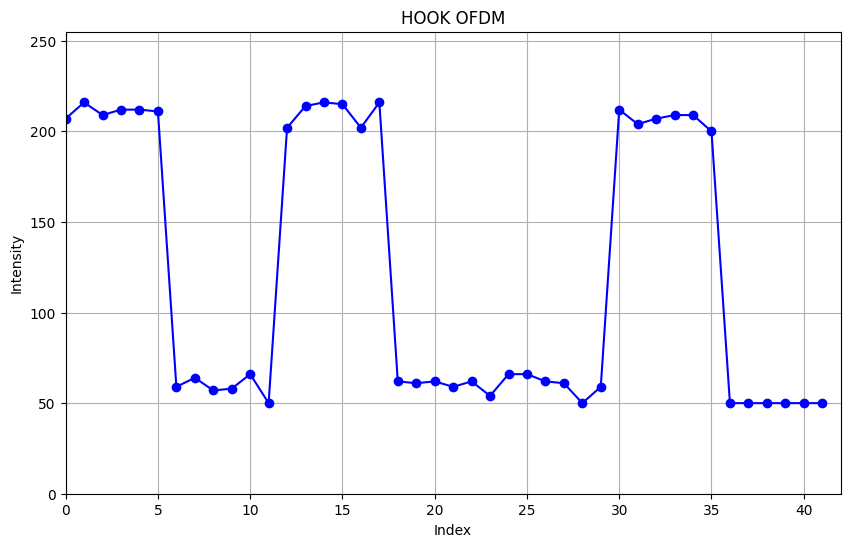

In [92]:
# Kode ini sudah selesai untuk HOOK OFDM
# Mixing Code, setiap bit 1 dan 0, digabung lagi menjadi 1 array
# Clipping +200(high), +100(low)
#sudah sederhana (fix 11PM) (Sudah Mixing, tapi jadi konsern, kalau OOK ada 7 bit, OFDM harus ada dikelipatan 7bit)
#tapi ini masih contoh, kalau untuk OFDM kita, bit OOK = 38, OFDM = 192 + 36(bit 0), jadi total = 228 OFDM. 228/38 = 6 bit per OOK

import matplotlib.pyplot as plt
OOK = [1, 0, 1, 0, 0, 1, 0]
hello1 = [7, 16, 9, 12, 12, 11, 9, 14, 7, 8, 16, 0, 2, 14, 16, 15, 2, 16, 12, 11, 12, 9, 12, 4, 16, 16, 12, 11, 0, 9, 12, 4, 7, 9, 9]

# Extend hello1 with 7 additional zeros
hello1.extend([0] * 7)
print("OFDM intensity =", hello1)

# Calculate the chunk size
chunk_size = len(hello1) // len(OOK)

# Pad hello1 to ensure it can be evenly divided by OOK length
hello1.extend([0] * (len(OOK) * chunk_size - len(hello1)))

# Distribute chunks to each bit in OOK with clipping
result = []
for i, bit in enumerate(OOK):
    # Extract the chunk for the current bit
    data_chunk = hello1[i * chunk_size:(i + 1) * chunk_size]
    # Apply clipping based on the value of the bit
    if bit == 1:
        data_chunk = [value + 200 for value in data_chunk]
    else:
        data_chunk = [value + 50 for value in data_chunk]
    # Append the result with the modified data chunk
    result.append((bit, data_chunk))

# Combine all chunks into one array
combined_data = [data for _, data_chunk in result for data in data_chunk]

# Output result
print("\nData OOK+OFDM MIXING CLIPPING =")
for bit, data in result:
    print(f"{bit} = {', '.join(map(str, data))}")

# Output the combined array
print("\nMixing Data:")
print(combined_data)


# Plotting the data
plt.figure(figsize=(10, 6))

# Plot intensity vs OOK bit index
plt.plot(combined_data, marker='o', linestyle='-', color='b', label="Intensity")
plt.ylim(0, 255)  # Y-axis limits (intensity range)
plt.xlim(0, len(combined_data))  # X-axis limits based on the length of combined data
plt.xlabel('Index')
plt.ylabel('Intensity')
plt.title('HOOK OFDM')
plt.grid(True)
plt.show()


OFDM intensity = [7, 16, 9, 12, 12, 11, 9, 14, 7, 8, 16, 0, 2, 14, 16, 15, 2, 16, 12, 11, 12, 9, 12, 4, 16, 16, 12, 11, 0, 9, 12, 4, 7, 9, 9, 11, 2, 12, 9, 13, 7, 6, 16, 16, 12, 3, 16, 0, 2, 12, 2, 0, 12, 12, 16, 4, 12, 12, 2, 16, 16, 12, 5, 11, 16, 16, 9, 9, 12, 10, 6, 13, 7, 5, 16, 0, 12, 8, 0, 9, 7, 9, 2, 16, 2, 0, 9, 11, 16, 13, 16, 11, 2, 9, 16, 7, 16, 10, 7, 16, 7, 14, 16, 15, 0, 0, 7, 13, 7, 8, 16, 2, 7, 11, 4, 9, 12, 16, 4, 13, 16, 7, 11, 0, 2, 11, 11, 9, 12, 12, 2, 16, 16, 12, 5, 11, 2, 12, 2, 0, 12, 12, 16, 4, 12, 16, 12, 16, 2, 0, 12, 9, 12, 6, 12, 16, 2, 16, 12, 9, 16, 12, 16, 7, 0, 12, 0, 7, 16, 12, 5, 7, 16, 12, 9, 7, 16, 3, 16, 16, 2, 9, 4, 12, 7, 12, 14, 1, 2, 6, 11, 13, 0, 0, 0, 0, 0, 0, 0]

Data OOK+OFDM MIXING CLIPPING =
1 = 207, 216, 209, 212, 212
0 = 61, 59, 64, 57, 58
1 = 216, 200, 202, 214, 216
0 = 65, 52, 66, 62, 61
1 = 212, 209, 212, 204, 216
0 = 66, 62, 61, 50, 59
1 = 212, 204, 207, 209, 209
0 = 61, 52, 62, 59, 63
0 = 57, 56, 66, 66, 62
1 = 203, 216, 200, 202,

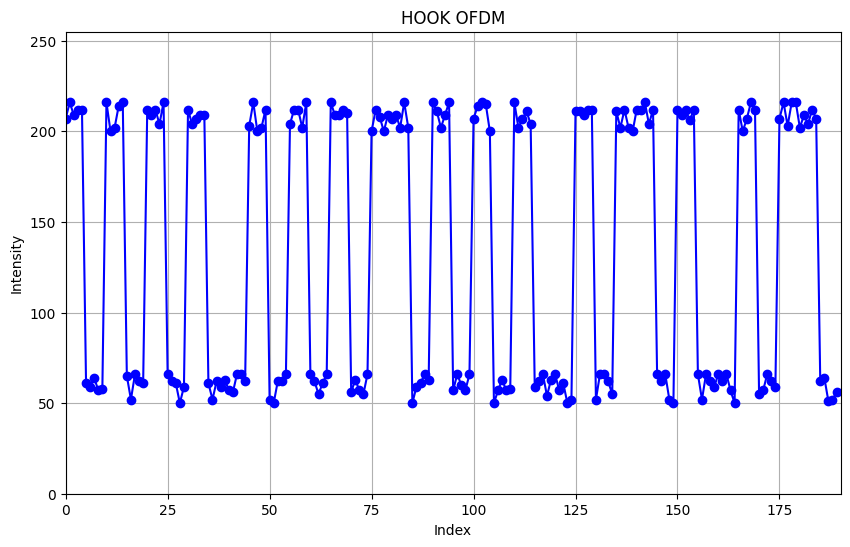

In [94]:
# Kode ini sudah selesai untuk HOOK OFDM
# Mixing Code, setiap bit 1 dan 0, digabung lagi menjadi 1 array
# Clipping +200(high), +100(low)
#sudah sederhana (fix 11PM) (Sudah Mixing, tapi jadi konsern, kalau OOK ada 7 bit, OFDM harus ada dikelipatan 7bit)
#---tapi ini masih contoh, kalau untuk OFDM kita, bit OOK = 38, OFDM = 192 + 36(bit 0), jadi total = 228 OFDM. 228/38 = 6 bit per OOK

import matplotlib.pyplot as plt
OOK = [1, 0, 1, 0, 0, 1, 0]

OOK = [1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0]
hello1 = [7, 16, 9, 12, 12, 11, 9, 14, 7, 8, 16, 0, 2, 14, 16, 15, 2, 16, 12, 11, 12, 9, 12, 4, 16, 16, 12, 11, 0, 9, 12, 4, 7, 9, 9, 11, 2, 12, 9, 13, 7, 6, 16, 16, 12, 3, 16, 0, 2, 12, 2, 0, 12, 12, 16, 4, 12, 12, 2, 16, 16, 12, 5, 11, 16, 16, 9, 9, 12, 10, 6, 13, 7, 5, 16, 0, 12, 8, 0, 9, 7, 9, 2, 16, 2, 0, 9, 11, 16, 13, 16, 11, 2, 9, 16, 7, 16, 10, 7, 16, 7, 14, 16, 15, 0, 0, 7, 13, 7, 8, 16, 2, 7, 11, 4, 9, 12, 16, 4, 13, 16, 7, 11, 0, 2, 11, 11, 9, 12, 12, 2, 16, 16, 12, 5, 11, 2, 12, 2, 0, 12, 12, 16, 4, 12, 16, 12, 16, 2, 0, 12, 9, 12, 6, 12, 16, 2, 16, 12, 9, 16, 12, 16, 7, 0, 12, 0, 7, 16, 12, 5, 7, 16, 12, 9, 7, 16, 3, 16, 16, 2, 9, 4, 12, 7, 12, 14, 1, 2, 6, 11, 13]



# Extend hello1 with 7 additional zeros
hello1.extend([0] * 7)
print("OFDM intensity =", hello1)

# Calculate the chunk size
chunk_size = len(hello1) // len(OOK)

# Pad hello1 to ensure it can be evenly divided by OOK length
hello1.extend([0] * (len(OOK) * chunk_size - len(hello1)))

# Distribute chunks to each bit in OOK with clipping
result = []
for i, bit in enumerate(OOK):
    # Extract the chunk for the current bit
    data_chunk = hello1[i * chunk_size:(i + 1) * chunk_size]
    # Apply clipping based on the value of the bit
    if bit == 1:
        data_chunk = [value + 200 for value in data_chunk]
    else:
        data_chunk = [value + 50 for value in data_chunk]
    # Append the result with the modified data chunk
    result.append((bit, data_chunk))

# Combine all chunks into one array
combined_data = [data for _, data_chunk in result for data in data_chunk]

# Output result
print("\nData OOK+OFDM MIXING CLIPPING =")
for bit, data in result:
    print(f"{bit} = {', '.join(map(str, data))}")

# Output the combined array
print("\nMixing Data:")
print(combined_data)


# Plotting the data
plt.figure(figsize=(10, 6))

# Plot intensity vs OOK bit index
plt.plot(combined_data, marker='o', linestyle='-', color='b', label="Intensity")
plt.ylim(0, 255)  # Y-axis limits (intensity range)
plt.xlim(0, len(combined_data))  # X-axis limits based on the length of combined data
plt.xlabel('Index')
plt.ylabel('Intensity')
plt.title('HOOK OFDM')
plt.grid(True)
plt.show()


HC = [7, 16, 9, 12, 12, 11, 9, 14, 7, 8, 16, 0, 2, 14, 16, 15, 2, 16, 12, 11, 12, 9, 12, 4, 16, 16, 12, 11, 0, 9, 12, 4, 7, 9, 9, 11, 2, 12, 9, 13, 7, 6, 16, 16, 12, 3, 16, 0, 2, 12, 2, 0, 12, 12, 16, 4, 12, 12, 2, 16, 16, 12, 5, 11, 16, 16, 9, 9, 12, 10, 6, 13, 7, 5, 16, 0, 12, 8, 0, 9, 7, 9, 2, 16, 2, 0, 9, 11, 16, 13, 16, 11, 2, 9, 16, 7, 16, 10, 7, 16, 7, 14, 16, 15, 0, 0, 7, 13, 7, 8, 16, 2, 7, 11, 4, 9, 12, 16, 4, 13, 16, 7, 11, 0, 2, 11, 11, 9, 12, 12, 2, 16, 16, 12, 5, 11, 2, 12, 2, 0, 12, 12, 16, 4, 12, 16, 12, 16, 2, 0, 12, 9, 12, 6, 12, 16, 2, 16, 12, 9, 16, 12, 16, 7, 0, 12, 0, 7, 16, 12, 5, 7, 16, 12, 9, 7, 16, 3, 16, 16, 2, 9, 4, 12, 7, 12, 14, 1, 2, 6, 11, 13, 0, 0, 0, 0, 0, 0, 0]
HOOK OFDM DATA
 [207, 216, 209, 212, 212, 61, 59, 64, 57, 58, 216, 200, 202, 214, 216, 65, 52, 66, 62, 61, 212, 209, 212, 204, 216, 66, 62, 61, 50, 59, 212, 204, 207, 209, 209, 61, 52, 62, 59, 63, 57, 56, 66, 66, 62, 203, 216, 200, 202, 212, 52, 50, 62, 62, 66, 204, 212, 212, 202, 216, 66, 62, 

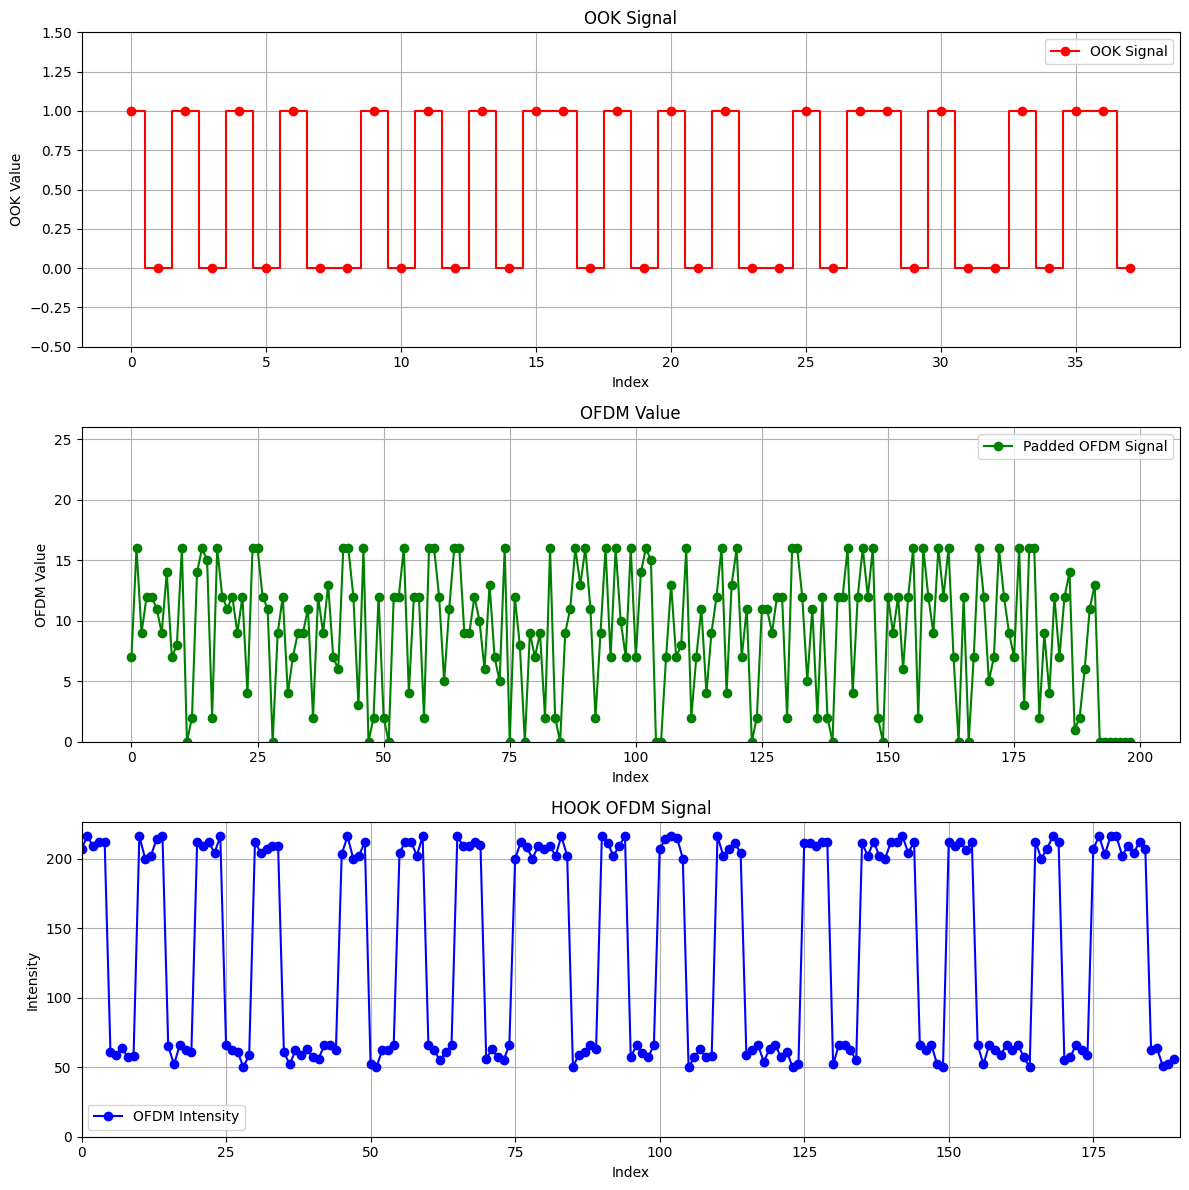

In [97]:
import matplotlib.pyplot as plt

OOK = [1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0]
hello1 = [7, 16, 9, 12, 12, 11, 9, 14, 7, 8, 16, 0, 2, 14, 16, 15, 2, 16, 12, 11, 12, 9, 12, 4, 16, 16, 12, 11, 0, 9, 12, 4, 7, 9, 9, 11, 2, 12, 9, 13, 7, 6, 16, 16, 12, 3, 16, 0, 2, 12, 2, 0, 12, 12, 16, 4, 12, 12, 2, 16, 16, 12, 5, 11, 16, 16, 9, 9, 12, 10, 6, 13, 7, 5, 16, 0, 12, 8, 0, 9, 7, 9, 2, 16, 2, 0, 9, 11, 16, 13, 16, 11, 2, 9, 16, 7, 16, 10, 7, 16, 7, 14, 16, 15, 0, 0, 7, 13, 7, 8, 16, 2, 7, 11, 4, 9, 12, 16, 4, 13, 16, 7, 11, 0, 2, 11, 11, 9, 12, 12, 2, 16, 16, 12, 5, 11, 2, 12, 2, 0, 12, 12, 16, 4, 12, 16, 12, 16, 2, 0, 12, 9, 12, 6, 12, 16, 2, 16, 12, 9, 16, 12, 16, 7, 0, 12, 0, 7, 16, 12, 5, 7, 16, 12, 9, 7, 16, 3, 16, 16, 2, 9, 4, 12, 7, 12, 14, 1, 2, 6, 11, 13]

# Extend hello1 with 7 additional zeros
hello1.extend([0] * 7)
print("HC =", hello1)

# Calculate the chunk size
chunk_size = len(hello1) // len(OOK)

# Pad hello1 to ensure it can be evenly divided by OOK length
padding_size = len(OOK) * chunk_size - len(hello1)
hello1.extend([0] * padding_size)

# Distribute chunks to each bit in OOK with clipping
result = []
for i, bit in enumerate(OOK):
    # Extract the chunk for the current bit
    data_chunk = hello1[i * chunk_size:(i + 1) * chunk_size]
    # Apply clipping based on the value of the bit
    if bit == 1:
        data_chunk = [value + 200 for value in data_chunk]
    else:
        data_chunk = [value + 50 for value in data_chunk]
    # Append the result with the modified data chunk
    result.append((bit, data_chunk))

# Combine all chunks into one array
combined_data = [data for _, data_chunk in result for data in data_chunk]
print ("HOOK OFDM DATA\n",combined_data)
# Plotting the signals
plt.figure(figsize=(12, 12))

# Subplot 1: OOK Signal
plt.subplot(3, 1, 1)
plt.step(range(len(OOK)), OOK, where='mid', linestyle='-', color='r', marker='o', label="OOK Signal")
plt.ylim(-0.5, 1.5)  # Limit y-axis to 0-1.5
plt.xlabel('Index')
plt.ylabel('OOK Value')
plt.title('OOK Signal')
plt.grid(True)
plt.legend()

# Subplot 2: Padded OFDM Signal
plt.subplot(3, 1, 2)
plt.plot(hello1, marker='o', linestyle='-', color='g', label="Padded OFDM Signal")
plt.ylim(0, max(hello1) + 10)  # Adjust y-axis range dynamically
plt.xlabel('Index')
plt.ylabel('OFDM Value')
plt.title('OFDM Value')
plt.grid(True)
plt.legend()

# Subplot 3: OFDM Intensity
plt.subplot(3, 1, 3)
plt.plot(combined_data, marker='o', linestyle='-', color='b', label="OFDM Intensity")
plt.ylim(0, max(combined_data) + 10)  # Intensity range
plt.xlim(0, len(combined_data))  # Data range
plt.xlabel('Index')
plt.ylabel('Intensity')
plt.title('HOOK OFDM Signal')
plt.grid(True)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
